# Determining Quantum Advantage in PK/PD for the Quantum Challenge 2025 - Quantum Computing for Pharmacokinetics (PK) / Pharmacodynamics (PD)

A submission by If and Only If (Iff) Technologies in collaboration with Southern Denmark University

## Overview of the Submission

This submission is a joint effort by researchers at If and Only If (Iff) Technologies in Pleasanton, California, USA and Southern Denmark University. We have developed a Quantum Fourier Transform (QFT) based interpolation methodology for approximating and extrapolating the PK/PD relationships. 

Here are our results to each of the questions framed by the competition: 

**What is the daily dose level (in whole multiples of 0.5 mg) that ensures that 90% of all subjects in a population similar to the one studied in the phase 1 trial achieve suppression of the biomarker below a clinically relevant threshold (3.3 ng/mL) throughout a 24-hour dosing interval at steady-state?**

**Which weekly dose level (in whole multiples of 5 mg) has the same effect over a 168-hour dosing interval at steady-state, if the compound was dosed once-weekly?
Suppose we change the body weight distribution of the population to be treated to 70-140 kg, how does that affect the optimal once-daily and once-weekly doses?** 

**Suppose we impose the restriction that concomitant medication is not allowed. How does that affect the optimal once-daily and once-weekly doses?**

**How much lower would the optimal doses in the above scenarios be if we were to ensure that only 75% of all subjects achieve suppression of the biomarker below the clinically relevant threshold (3.3 ng/mL)**


## Part 0: Team Background and Project Introduction

Founded in 2020 out of research at the University of California, Davis, Iff Technologies is a startup focused on the development of immunotherapeutics and/or relevant immunological biomarkers through the usage of quantum (chemistry, information science, and device based) technologies. Most importantly, Iff is interested in characterizing and improving upon the complexity of completing ideal case, mechanistic *in silico* approaches to drug discovery, development, and trialing, and to be able to effectively compare these methods against best-in-class *in vitro* and *in vivo* techniques to guide pre-clinical drug development, clinical endpoint development, and eventual synthesis pathways for the immunotherapies or biomarkers we develop or discover.

Iff was founded in 2020 by Samarth Sandeep and was later joined by Kirk McGregor as a cofounder. 

Samarth has been working in software development in Silicon Valley and adjancent companies since 2015, and has worked on iOS apps such as Studypool, web applications such as the SMBX, and more. As a Materials Engineering student at UC Davis, Samarth was the business team leader for Oneloop, Chief Technology Officer at Blockchain at Davis, Founder of Hard Tech Fund, UC Davis' first sustainable hardware accelerator, and, most relevant to this submission, founder of Quantum Computing at Davis, where he led a project sponsored by IBM for protein placement on quatnum devices, among others. He founded Iff first to attempt quantum algorithmic simulation of biological systems in biomaterials, but pivoted thanks to research project collaborations with Dr. Nitin Nitin of the Mondavi Institute at UC Davis and Dr. Angela Haczku of UC Davis Medical Center, both of whom guided Samarth towards protein-ligand and protein-protein docking improvements through protein pruning. Samarth has also worked at Deloitte's Quantum Computing team, where he coauthored a paper on Quantum Graph Neural Network (QGNN) usage in molecular modeling prediction and developed, as well as analyzed and developed early stage business use cases of quantum computing with specific emphasis on financial services and life sciences. Serving as Iff's CEO, Samarth has led business development, software development, and user engagement tasks for much of the past 5 years, with a focus on meaningful advancements in drug discovery.

Kirk has been a grant writer with experience in medically oriented, biochemistry oriented, and large scale compute oreinted small businesss in research (SBIR) grants and similar for more than a decade with collaborators and clients around UC Davis and the California region, with a cumulative total above $1M. Serving as Iff's Chief Strategy Officer, Kirk has led software architecture, business strategy, and research strategy development at the company for the past 4 years.

Together, Iff has scored collaborations with research hospitals and biopharma firms worldwide, and our research in protein pruning for protein docking, molecular dynamics, and IC50 score estimation has been cited by Pfizer, Cleveland Clinic, and others. Today, Iff is focussed on furthering its collaborations to develop meaningful therapeutic outcomes, especially in areas we already have completed preliminary research in.

It is through our specific work on surfactant proteins as immune proteins that provide host defense against pathogens, such as SARS-CoV-2, that we were able to meet Dr. Grith Sørensen of the Cancer and Inflammation Unit at Southern Denmark University. She is a domain expert on surfactant proteins, respiratory science, and oncology, with years of experience in these areas. Together, we are interested in better understanding the impact of engineered surfactant proteins and other immune proteins in the same family against infectious diseases. While we have experience and some methodologies for completing protein-protein docking and molecular dynamics for attempting to understand the asssembly of engineered immune proteins against known pathogens, there do not exist well characterized pKa and IC50 data for such proteins, making statistical modeling of any potential dosing regimes prior to *in vivo* or human trials difficult and especially challenging given the already known secondary and beyond biomarker interactions that would result from the dosing of a synthetic immune protein.

Therefore, we wanted to join this competition, at the least to gain access to GEFION for trialing various approaches to dosing modeling, and at best to provide a solution that can be widely used for PK/PD simulation, and the very best, to identify if a meaningful quantum advantage could exist in this task. 


    ## Part 1: Looking at the data provided by the challenge

The first step in this modeling activity is to plot the different data that is being observed, and to look at features of this data. We will do this very simply using matplotlib. There is a placebo group and a drug group. It is important to even model the 0 mg level for the following reasons: 

1. Placebos work: If biomarkers fluctuate, we need to be able to see this before giving the placebo dosage.
2. This is a time series, so need to be able to start the time modeling at T=0 for all cases.
3. The placebo group should be considered as all 0 mg dosages of the drug, but need to ensure that this is actually a correct assumption to make by looking at concentration and biomarker charts.

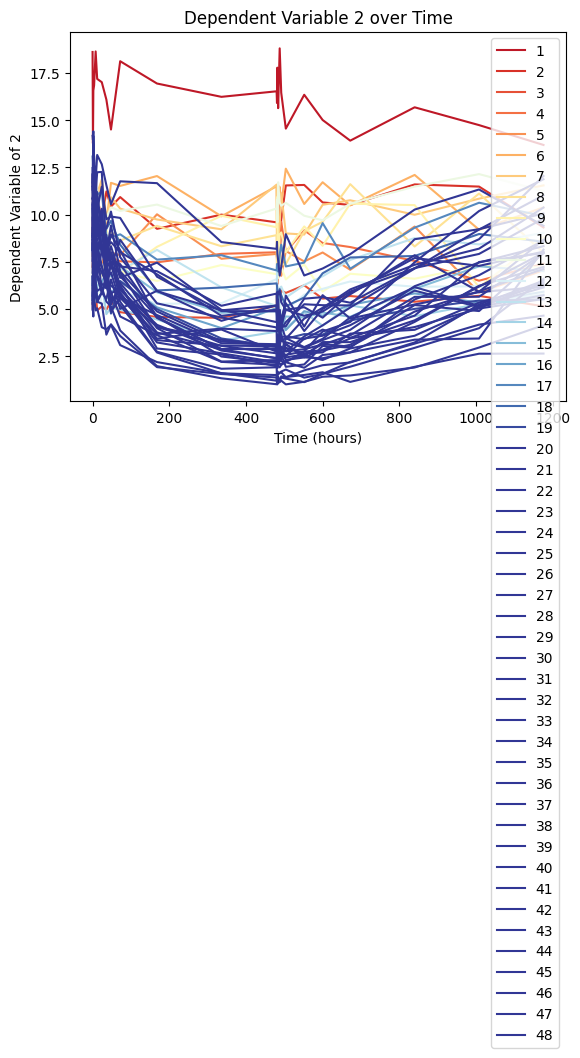

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("QIC2025-EstDat.csv")

totalNumberOfPatients = 48
i = 1 
patients = []
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & MDV==0 & DVID==2')['TIME'] , df.query(f'ID=={i} & MDV==0 & DVID==2')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Time (hours)")
    plt.ylabel("Dependent Variable of 2")
    plt.title("Dependent Variable 2 over Time")
    patients.append(i)
    i += 1

plt.legend(patients)



    

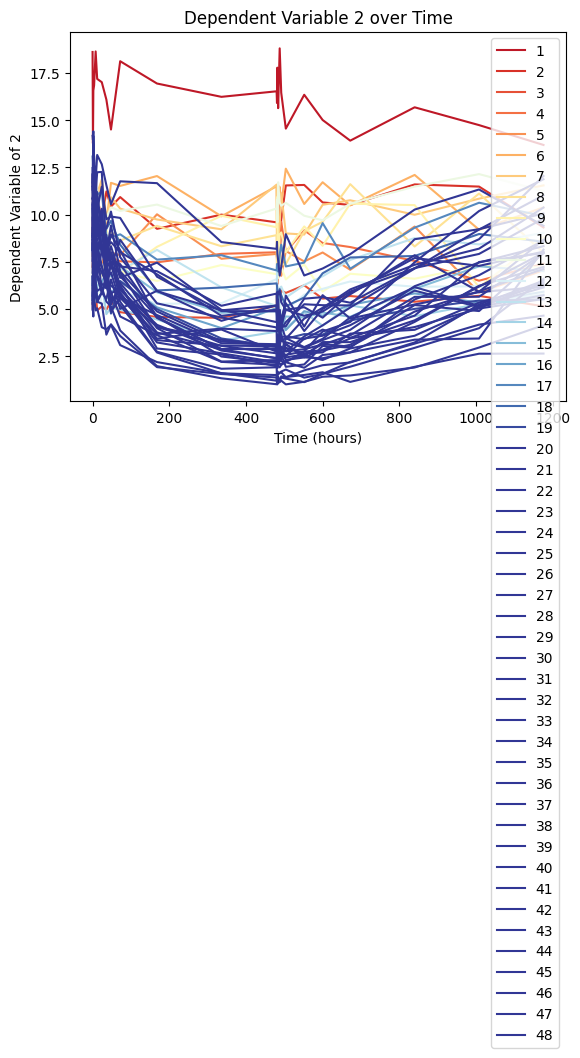

In [77]:
totalNumberOfPatients = 48
i = 1 
patients = []
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DVID==2')['TIME'] , df.query(f'ID=={i} & DVID==2')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Time (hours)")
    plt.ylabel("Dependent Variable of 2")
    plt.title("Dependent Variable 2 over Time")
    patients.append(i)
    i += 1

plt.legend(patients)

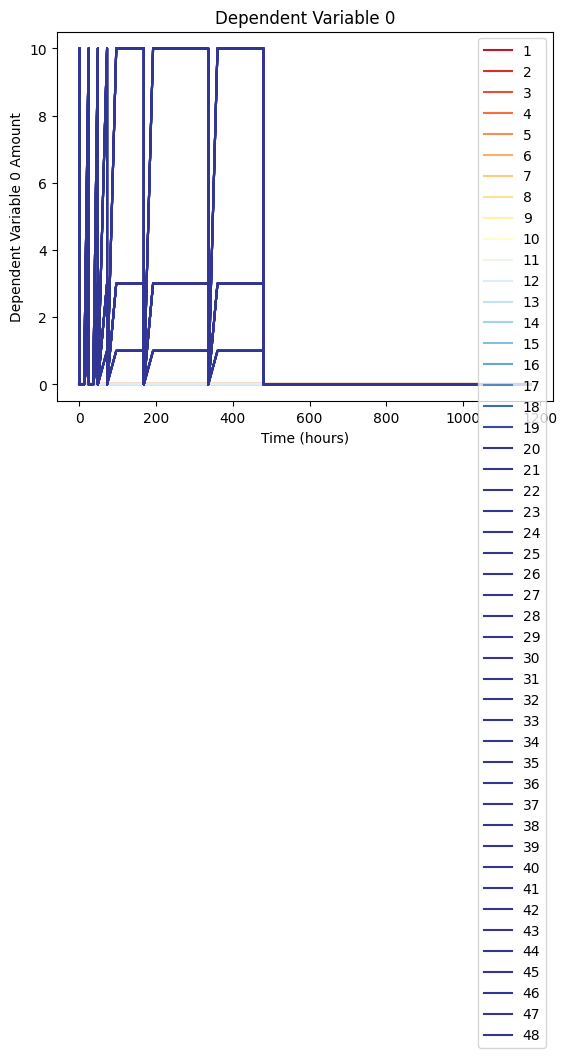

In [78]:
patients = []
i = 1;
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i}')['TIME'] , df.query(f'ID=={i}')['AMT'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Time (hours)")
    plt.ylabel("Dosage Amount")
    plt.title("Actual Dose Administered over Time")
    patients.append(i)
    i += 1
plt.legend(patients)


patients = []
i = 1;
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & MDV==0 & DVID==0')['TIME'] , df.query(f'ID=={i} & MDV==0 & DVID==0')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Time (hours)")
    plt.ylabel("Dependent Variable 0 Amount")
    plt.title("Dependent Variable 0")
    patients.append(i)
    i += 1
plt.legend(patients)


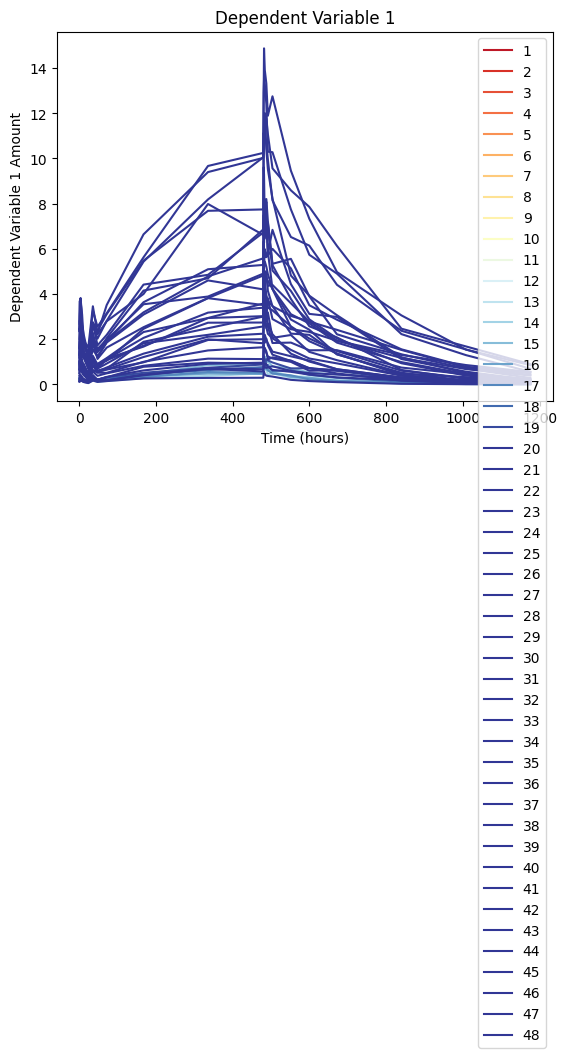

In [79]:
patients = []
i = 1;
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & MDV==0 & DVID==1')['TIME'] , df.query(f'ID=={i} & MDV==0 & DVID==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Time (hours)")
    plt.ylabel("Dependent Variable 1 Amount")
    plt.title("Dependent Variable 1")
    patients.append(i)
    i += 1
plt.legend(patients)

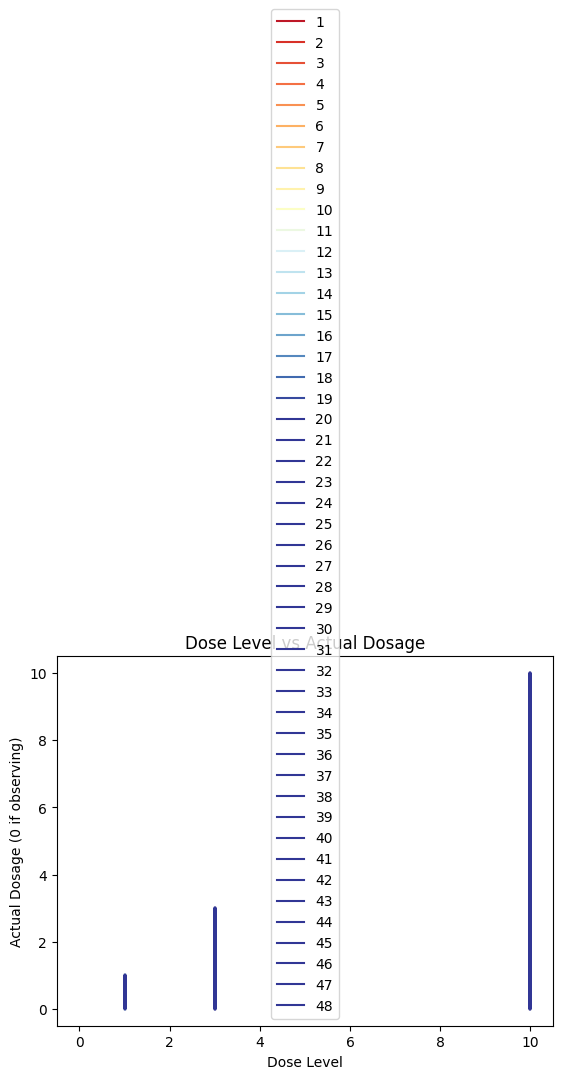

In [80]:
patients = []
i = 1;
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i}')['DOSE'] , df.query(f'ID=={i}')['AMT'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Dose Level")
    plt.ylabel("Actual Dosage (0 if observing)")
    plt.title("Dose Level vs Actual Dosage")
    patients.append(i)
    i += 1
plt.legend(patients)

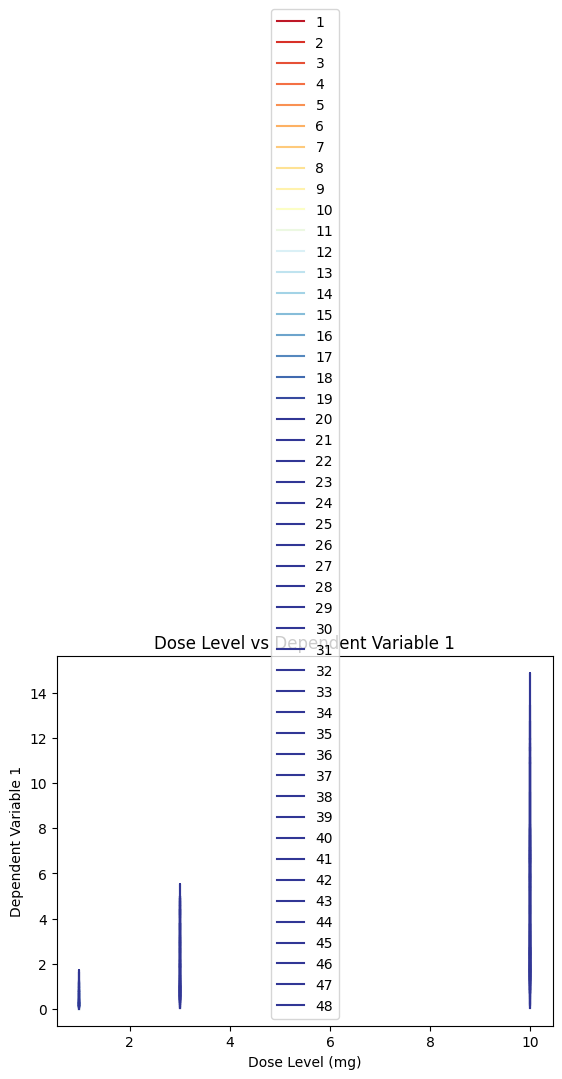

In [81]:
patients = []
i = 1;
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DVID==1')['DOSE'] , df.query(f'ID=={i} & DVID==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Dose Level (mg)")
    plt.ylabel("Dependent Variable 1")
    plt.title("Dose Level vs Dependent Variable 1")
    patients.append(i)
    i += 1
plt.legend(patients)

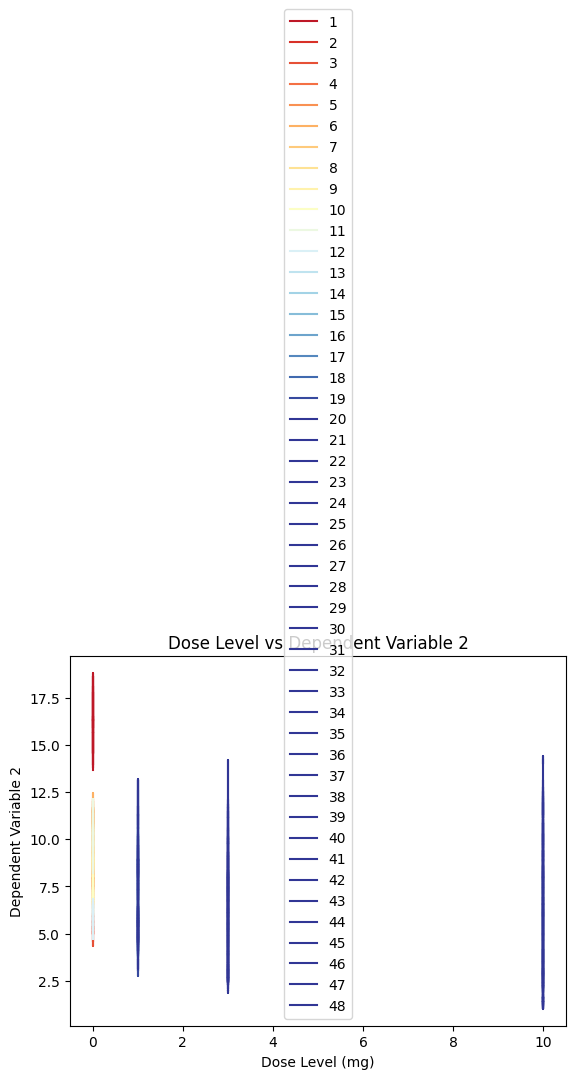

In [82]:
patients = []
i = 1;
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & MDV==0 & DVID==2')['DOSE'] , df.query(f'ID=={i} & MDV==0 & DVID==2')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Dose Level (mg)")
    plt.ylabel("Dependent Variable 2")
    plt.title("Dose Level vs Dependent Variable 2")
    patients.append(i)
    i += 1
plt.legend(patients)

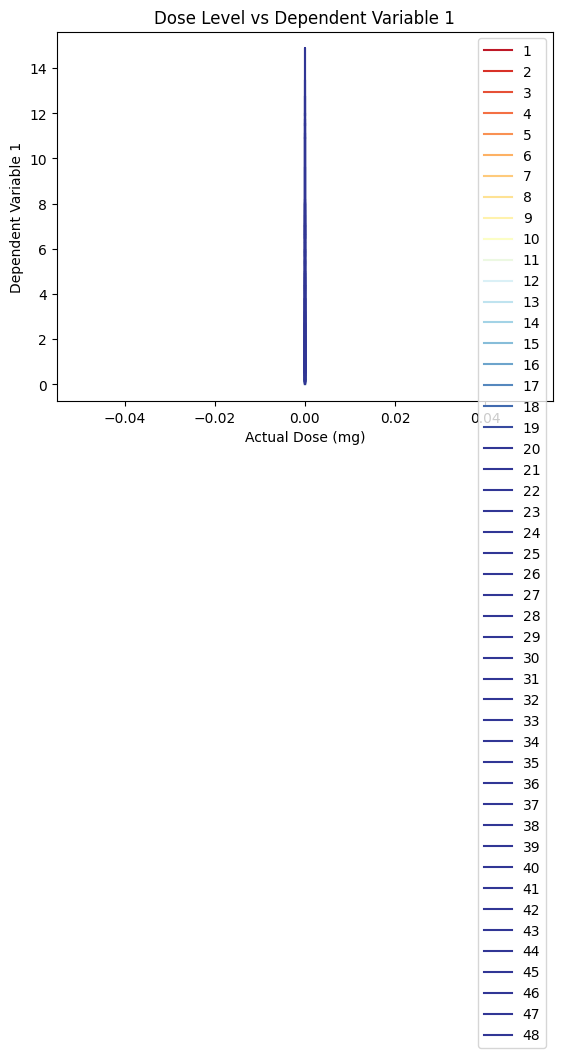

In [83]:
patients = []
i = 1;
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & MDV==0 & DVID==1')['AMT'] , df.query(f'ID=={i} & MDV==0 & DVID==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Actual Dose (mg)")
    plt.ylabel("Dependent Variable 1")
    plt.title("Dose Level vs Dependent Variable 1")
    patients.append(i)
    i += 1
plt.legend(patients)

## Part 2: Determine if there is a quantum advatange in modeling here by looking at the ordinary differential equations being solved here: classical vs quantum ODE solvers?

First, we will attempt to use a well known classical ODE solver for modeling the concentration effect over time (canonically, the Pharmacokinetics and the Pharmacodynamics of the molecule) based on different doses. Given that we have the Amount (A) administered and also the Time (T), we can find our one compartment K by solving this equation:

$ K = -((dA/dt) * A) $

We will first do this for a dosage amount of 1mg, wherein A = 1mg. 

In [84]:
from scipy.stats import linregress
dAdt = (linregress(df['TIME'], df['AMT'])).slope
K = -1*(dAdt*1)
print("K = ", K)


K =  0.001259311558784244


Now, we will use this K to predict the concentrations at any given time given a dosage of 3mg, and compare to the dosage graph for 3mg given equation 8 from from this 'Introduction to PK/PD modelling Introduction to PK/PD modelling" by  Stig Mortensen, Anna Helga J´onsd´ottir,
Søren Klim and Henrik Madsen (https://backend.orbit.dtu.dk/ws/portalfiles/portal/3101725/tr08_16.pdf)

$ C_{bolus} = A_{0}/V * exp(-Kt) $

We also know that  $ V = A_0/C $ and will solve this first taking the median concentration at dose = 1mg

1.2066534873291328


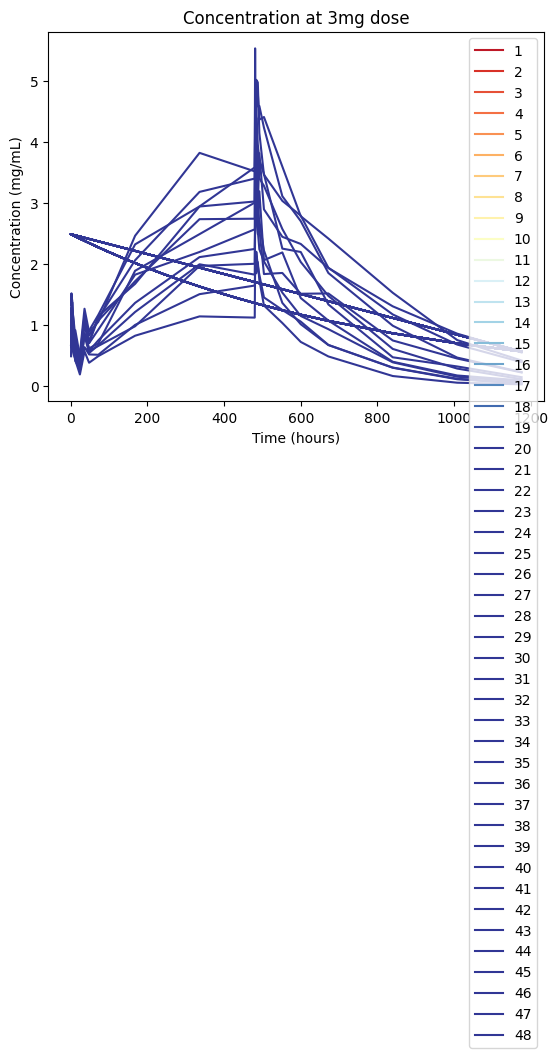

In [85]:
A0 = 3 
Cstart = df.query("DOSE==1 & TIME==0")["DV"].median()
V = A0 / Cstart
print(V)
patients = []
i = 1;
totalNumberOfPatients = 48
import math
A_bolusat3mg = []

for t in df.query('DOSE==3')['TIME']:
    A_bolusat3mg.append((A0/V)*math.exp(-K*t))
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DOSE==3 & DVID==1')['TIME'] , df.query(f'ID=={i} & DOSE==3 & DVID==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration (mg/mL)")
    plt.title("Concentration at 3mg dose")
    patients.append(i)
    i += 1
plt.plot( df.query('DOSE==3')['TIME'] , A_bolusat3mg, color=plt.cm.RdYlBu(i*13), linestyle='dashed')
plt.legend(patients)

It would appear that a single compartment model would, which was what $ C_{bolus} = A_{0}/V * exp(-Kt) $ was set up to model, will not work here, especially considering the numerous peaks and troughs, indicating >2 compartments at a minimum. Another classical technique that could be used is stochastic differential equation modeling. 

First, we will attempt to find the an equation that matches a dose of 1 mg based upon the shifts at each point by first interpolating the points using known interpolaters from Scipy, such as the RBF interpolator. Then, we will see if this extends to a 3mg dose

kernel quintic
y [[1.000e+00]
 [2.000e+00]
 [4.000e+00]
 [8.000e+00]
 [1.200e+01]
 [2.400e+01]
 [3.600e+01]
 [4.800e+01]
 [7.200e+01]
 [1.680e+02]
 [3.360e+02]
 [4.800e+02]
 [4.810e+02]
 [4.820e+02]
 [4.840e+02]
 [4.880e+02]
 [4.920e+02]
 [5.040e+02]
 [5.520e+02]
 [6.000e+02]
 [6.720e+02]
 [8.400e+02]
 [1.008e+03]
 [1.176e+03]]
d [[0.197368 ]
 [0.2508   ]
 [0.336229 ]
 [0.232272 ]
 [0.183518 ]
 [0.109713 ]
 [0.322177 ]
 [0.200794 ]
 [0.247387 ]
 [0.431029 ]
 [0.634274 ]
 [0.765795 ]
 [1.07815  ]
 [1.15866  ]
 [1.08354  ]
 [0.849379 ]
 [0.860929 ]
 [0.597931 ]
 [0.627855 ]
 [0.427575 ]
 [0.29344  ]
 [0.123339 ]
 [0.0722271]
 [0.0317666]]
d_shape ()
d_type <class 'float'>
powers [[0]
 [1]
 [2]]
epsilon 1.0
neighbors None
smoothing [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


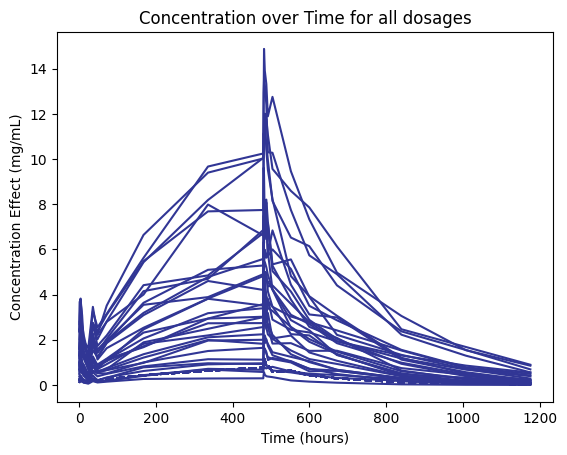

In [86]:
import scipy
from scipy.interpolate import RBFInterpolator, InterpolatedUnivariateSpline
#setting up the interpolator at patient 18, which we know has a concentration value
rbf = RBFInterpolator(df.query('ID==18 & DOSE==1 & DVID==1')["TIME"].to_numpy().reshape(-1,1), df.query('ID==18 & DOSE==1 & DVID==1')["DV"].to_numpy(), kernel='quintic')
print("kernel", rbf.kernel)
print("y", rbf.y)
print("d", rbf.d)
print("d_shape", rbf.d_shape)
print("d_type", rbf.d_dtype)
print("powers", rbf.powers)
print("epsilon", rbf.epsilon)
print("neighbors", rbf.neighbors)
print("smoothing", rbf.smoothing)


i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DVID==1')['TIME'] , df.query(f'ID=={i} & DVID==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.plot( df.query(f'ID=={i} & DVID==1')['TIME'] , rbf(df.query(f'ID=={i} & DVID==1')["TIME"].to_numpy().reshape(-1,1)), color=plt.cm.RdYlBu(i*13), linestyle='dashed')
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration Effect (mg/mL)")
    plt.title("Concentration over Time for all dosages")
    i+=1

And here are those same graphs without Concomitant medicines

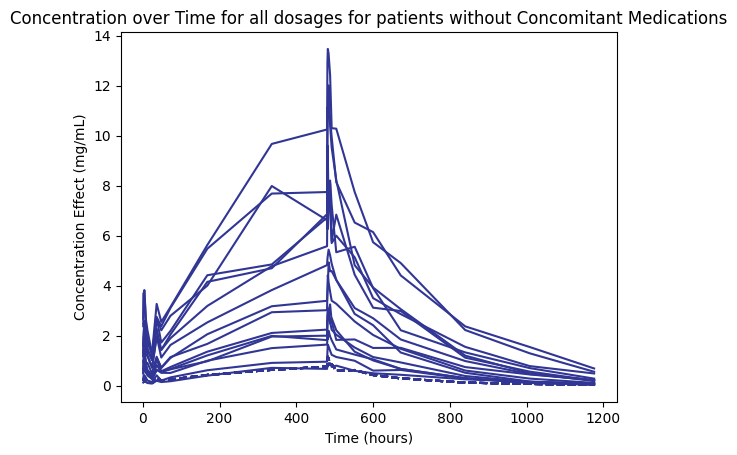

In [87]:
i = 20;
totalNumberOfPatients = 52
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DVID==1 & COMED==0')['TIME'] , df.query(f'ID=={i} & DVID==1 & COMED==0')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.plot( df.query(f'ID=={i} & DVID==1 & COMED==0')['TIME'] , rbf(df.query(f'ID=={i} & DVID==1 & COMED==0')["TIME"].to_numpy().reshape(-1,1)), color=plt.cm.RdYlBu(i*13), linestyle='dashed')
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration Effect (mg/mL)")
    plt.title("Concentration over Time for all dosages for patients without Concomitant Medications")
    i+=1

And only with concomitant medicines

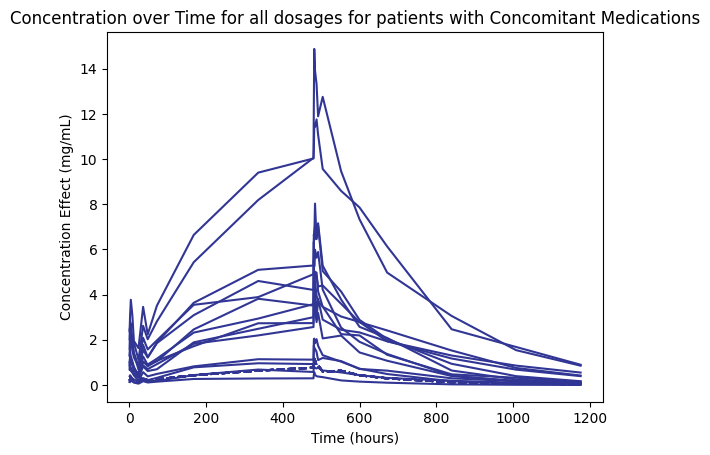

In [88]:
i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DVID==1 & COMED==1')['TIME'] , df.query(f'ID=={i} & DVID==1 & COMED==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.plot( df.query(f'ID=={i} & DVID==1 & COMED==1')['TIME'] , rbf(df.query(f'ID=={i} & DVID==1 & COMED==1')["TIME"].to_numpy().reshape(-1,1)), color=plt.cm.RdYlBu(i*13), linestyle='dashed')
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration Effect (mg/mL)")
    plt.title("Concentration over Time for all dosages for patients with Concomitant Medications")
    i+=1

Now, I will break down the PKPD graph by compartment.

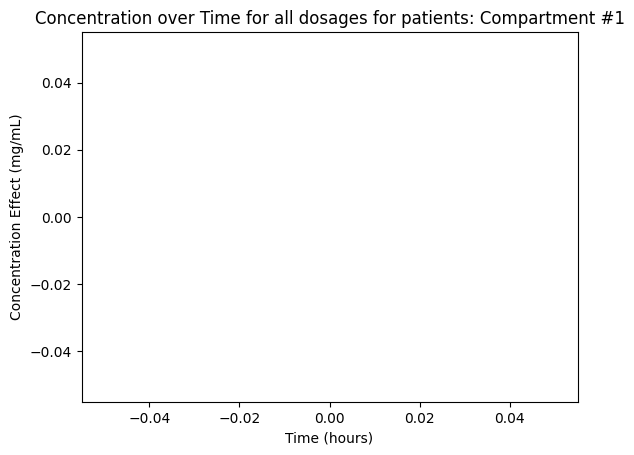

In [89]:
i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DVID==1 & CMT==1')['TIME'] , df.query(f'ID=={i} & DVID==1 & CMT==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.plot( df.query(f'ID=={i} & DVID==1 & CMT==1')['TIME'] , rbf(df.query(f'ID=={i} & DVID==1 & CMT==1')["TIME"].to_numpy().reshape(-1,1)), color=plt.cm.RdYlBu(i*13), linestyle='dashed')
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration Effect (mg/mL)")
    plt.title("Concentration over Time for all dosages for patients: Compartment #1")
    i+=1

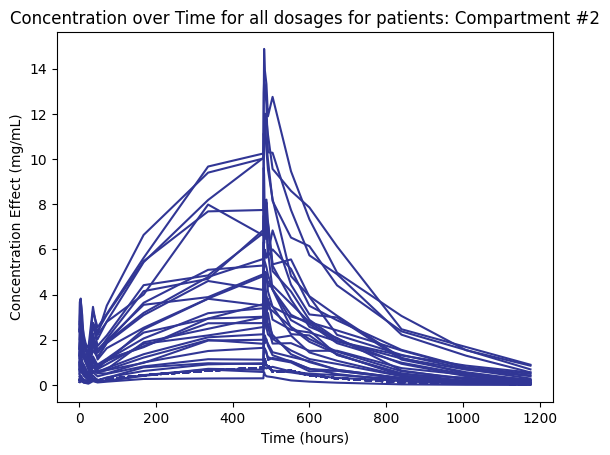

In [90]:
i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DVID==1 & CMT==2')['TIME'] , df.query(f'ID=={i} & DVID==1 & CMT==2')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.plot( df.query(f'ID=={i} & DVID==1 & CMT==2')['TIME'] , rbf(df.query(f'ID=={i} & DVID==1 & CMT==2')["TIME"].to_numpy().reshape(-1,1)), color=plt.cm.RdYlBu(i*13), linestyle='dashed')
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration Effect (mg/mL)")
    plt.title("Concentration over Time for all dosages for patients: Compartment #2")
    i+=1

As you can see, in the PKPD graph of Time vs Effect, the effects of the concomitant medicine are not immediately visible

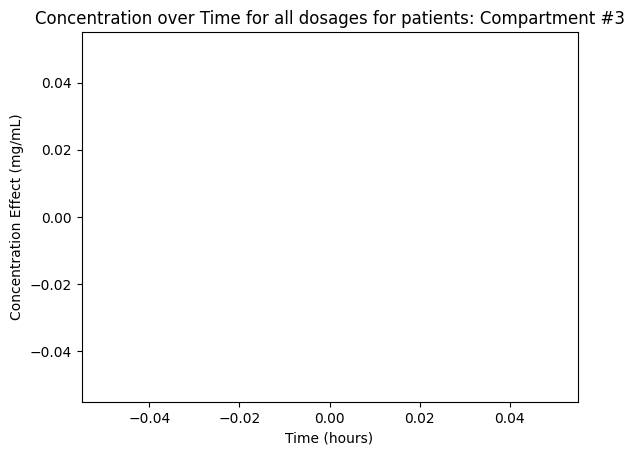

In [91]:
i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DVID==1 & CMT==3')['TIME'] , df.query(f'ID=={i} & DVID==1 & CMT==3')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.plot( df.query(f'ID=={i} & DVID==1 & CMT==3')['TIME'] , rbf(df.query(f'ID=={i} & DVID==1 & CMT==3')["TIME"].to_numpy().reshape(-1,1)), color=plt.cm.RdYlBu(i*13), linestyle='dashed')
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration Effect (mg/mL)")
    plt.title("Concentration over Time for all dosages for patients: Compartment #3")
    i+=1

Since the time inputs are the same for 3mg and 1mg, the interpolator does not do a good job of predicting different concentrations. I will now try and set up the interpolator for the actual concentration provided (AMT) vs the effect that was observed. Here, I use randomizer between 0 and 0.1 to add to each dose value such that RBF can actually create radial basis functions for each input

d_shape ()
d_type <class 'float'>
powers [[0]
 [1]]
epsilon 1.0
neighbors None
smoothing [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

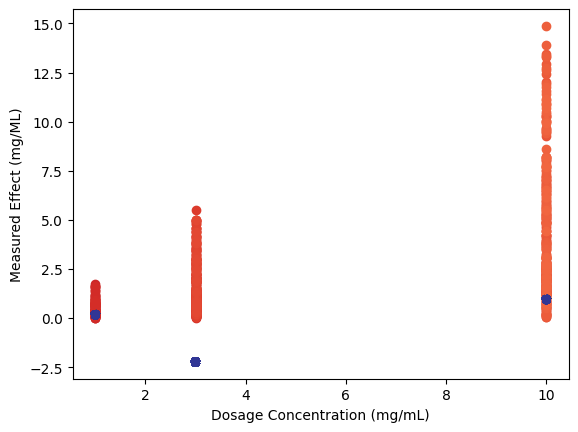

In [92]:
import scipy
import numpy as np
from scipy.interpolate import RBFInterpolator, InterpolatedUnivariateSpline
doseValues = df.query('DVID==1')["DOSE"].to_numpy().astype(np.float64)
doseValues += np.random.uniform(0,0.1,size=len(doseValues))
rbf = RBFInterpolator(doseValues.reshape(-1,1), df.query('DVID==1')["DV"].to_numpy())
#print("kernel", rbf.kernel)
#print("y", rbf.y)
#print("d", rbf.d)
print("d_shape", rbf.d_shape)
print("d_type", rbf.d_dtype)
print("powers", rbf.powers)
print("epsilon", rbf.epsilon)
print("neighbors", rbf.neighbors)
print("smoothing", rbf.smoothing)


i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.scatter( df.query(f'ID=={i} & DVID==1')['DOSE'] , df.query(f'ID=={i} & DVID==1')['DV'], color=plt.cm.RdYlBu(i))
    plt.scatter( df.query(f'ID=={i} & DVID==1')['DOSE'] , rbf(df.query(f'ID=={i} & DVID==1')["DOSE"].to_numpy().reshape(-1,1)), color=plt.cm.RdYlBu(i*55), linestyle='dashed')
    plt.xlabel("Dosage Concentration (mg/mL)")
    plt.ylabel("Measured Effect (mg/ML)")
    plt.autoscale()
    i+=1

Above, the orange represents the actual amounnts found given each dosage and the blue represents the RBF interpolation based output amounts.
It would appear that the RBF interpolation does not always work tremendously well for predicting the next concentration amounts given the input dosage amounts, and its performance is largely based on the randomization of the dosage amount inputs.

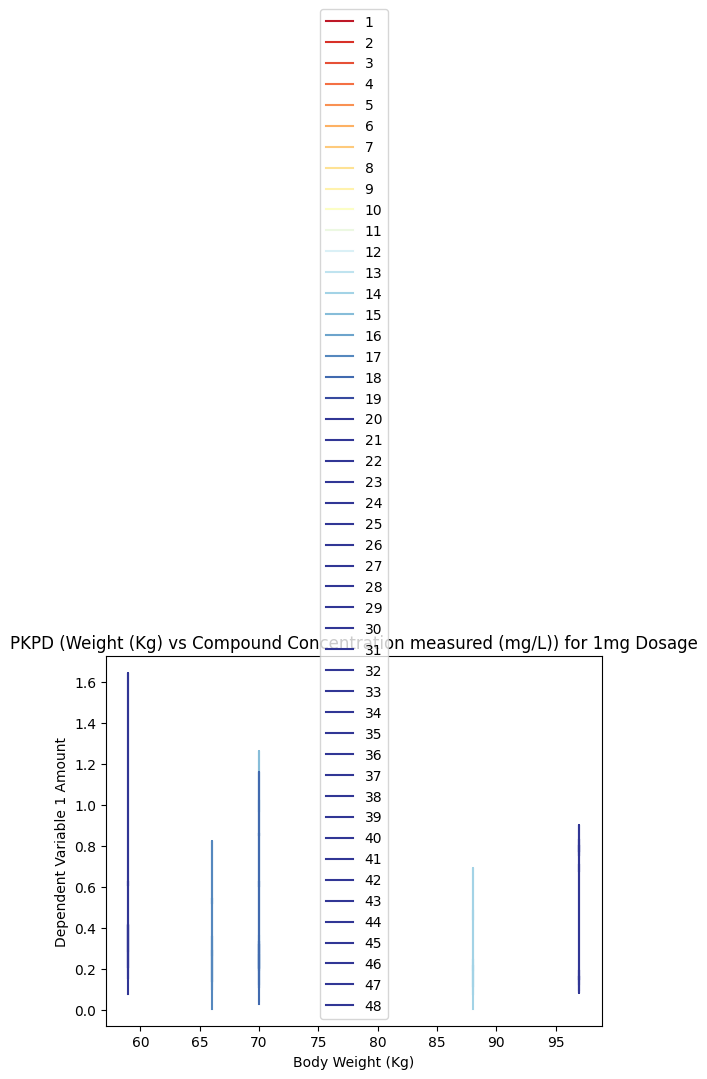

In [93]:
patients = []
i = 1;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & COMED==0 & DOSE==1 & MDV==0 & DVID==1')['BW'] , df.query(f'ID=={i} & COMED==0 & DOSE==1 & MDV==0 & DVID==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Body Weight (Kg)")
    plt.ylabel("Dependent Variable 1 Amount")
    plt.title("PKPD (Weight (Kg) vs Compound Concentration measured (mg/L)) for 1mg Dosage")
    patients.append(i)
    i += 1
plt.legend(patients)

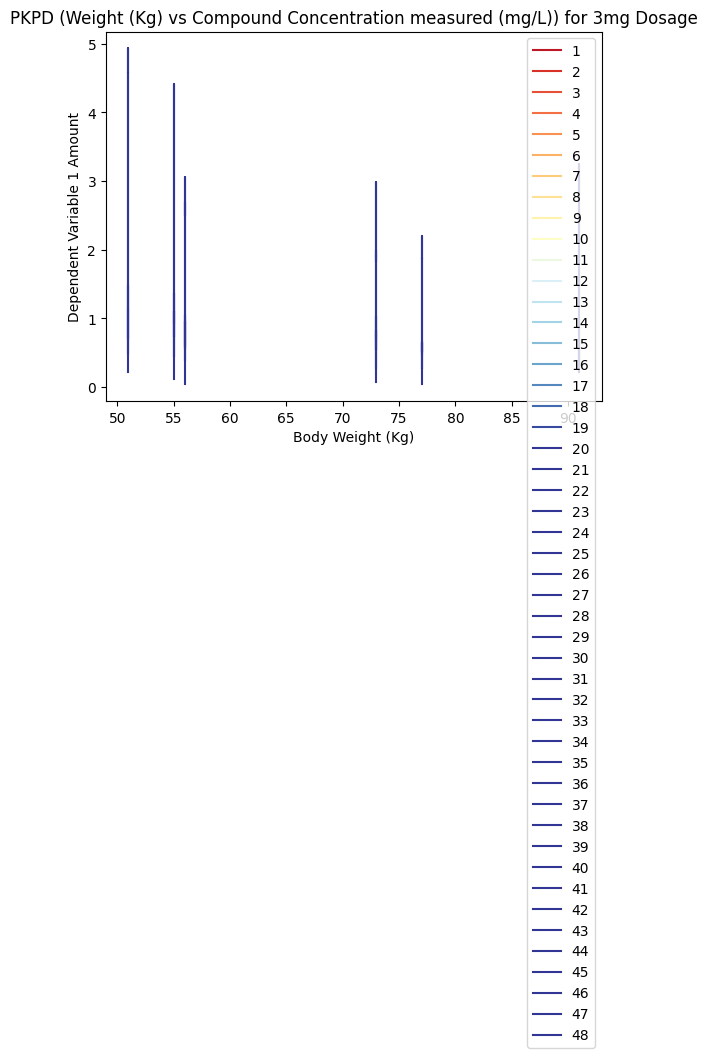

In [94]:
patients = []
i = 1;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & DOSE==3 & COMED==0 & MDV==0 & DVID==1')['BW'] , df.query(f'ID=={i} & DOSE==3 & COMED==0 & MDV==0 & DVID==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Body Weight (Kg)")
    plt.ylabel("Dependent Variable 1 Amount")
    plt.title("PKPD (Weight (Kg) vs Compound Concentration measured (mg/L)) for 3mg Dosage")
    patients.append(i)
    i += 1
plt.legend(patients)

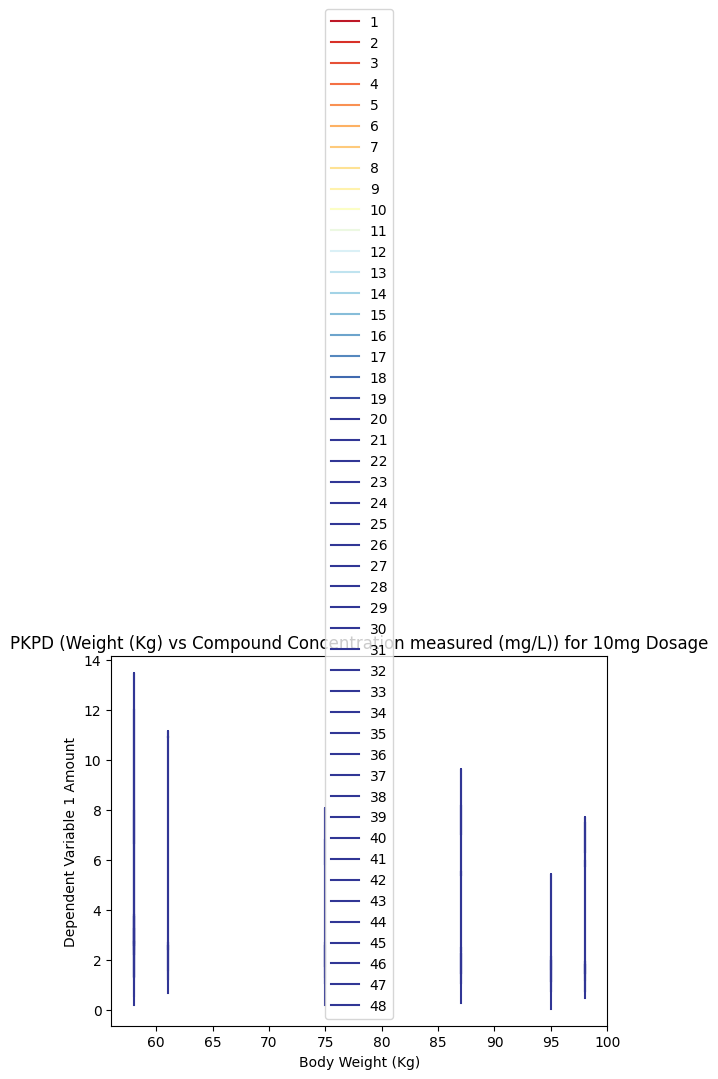

In [97]:
patients = []
i = 1;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.plot( df.query(f'ID=={i} & COMED==0 & DOSE==10 & MDV==0 & DVID==1')['BW'] , df.query(f'ID=={i} & COMED==0 & DOSE==10 & MDV==0 & DVID==1')['DV'], color=plt.cm.RdYlBu(i*13))
    plt.xlabel("Body Weight (Kg)")
    plt.ylabel("Dependent Variable 1 Amount")
    plt.title("PKPD (Weight (Kg) vs Compound Concentration measured (mg/L)) for 10mg Dosage")
    patients.append(i)
    i += 1
plt.legend(patients)

## Quantum Based Interpolation Methods

It is possible that there is a Linbladian based approach that can be helpful for certain edge case modeling of PK/PD ODEs, such as perhaps a no or multi compartment model, considering that the boundary of the compartment might be continous/"fuzzy", such as potentially organ-on-chip models. However, as shown above, an approach based upon the differential equations governing the mechanistic effects to increasing dosage will not work effectively here.

This would appear to be potentially important here given the occurence of 3 compartments, but no ability to clearly see the difference in effect of each compartment vs. time, and the effect instead being based more on the actual dosage amount provided. 

To create a quantum based interpolation method for the dosage vs effect chart, I will attempt to implement "Efficient quantum interpolation of natural data"'s method (https://arxiv.org/pdf/2203.06196). 

First, and most problematically, I need to somehow put the effectual concentration values into my quantum circuit. I will be using Pennylane to complete this and any further circuit writing, as it can scale to NVIDIA GPUs well (more on this later).

[0.186473  0.245674  0.256092  0.215776  0.152528  0.0551604 0.190884
 0.110174  0.205427  0.365588  0.475907  0.53136   0.686488  0.747435
 0.807693  0.787551  0.606553  0.59121   0.372569  0.340783 ]
[0.58279278 0.03501529 0.04623597 ... 0.01223771 0.04623597 0.03501529]


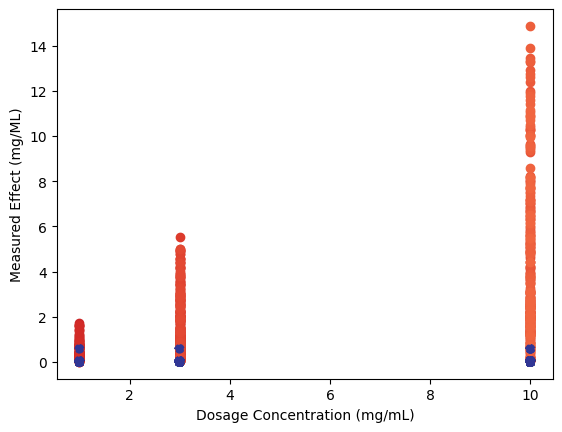

In [96]:
import pennylane as qml

effectValues = df.query('DVID==1')["DV"].to_numpy().astype(np.float64)[0:20]
print(effectValues)
dev = qml.device('default.qubit', wires=len(effectValues))

U = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
@qml.qnode(dev)
def example_circuit():
    wireIterator = 0
    for effectValue in effectValues: 
        qml.RY(effectValue, wires=wireIterator)
        qml.QubitUnitary(U, wires=wireIterator)
        wireIterator += 1
    

    qml.QFT(wires=range(len(effectValues),0))
    #inverse QFT 
    qml.QFT(wires=range(0,len(effectValues)))

    return qml.state()

QFToutputs = np.abs(example_circuit())

i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    plt.scatter( df.query(f'ID=={i} & DVID==1')['DOSE'] , df.query(f'ID=={i} & DVID==1')['DV'], color=plt.cm.RdYlBu(i))
    plt.scatter( df.query(f'ID=={i} & DVID==1')['DOSE'] , QFToutputs[0:len(df.query(f'ID=={i} & DVID==1')['DOSE'])], color=plt.cm.RdYlBu(i*55), linestyle='dashed')
    plt.xlabel("Dosage Concentration (mg/mL)")
    plt.ylabel("Measured Effect (mg/ML)")
    plt.autoscale()
    i+=1
print(np.abs(example_circuit()))

While this method did produce some concentration values within the ranges of measured values, the overall distributions were not replicated. There needs to be further attention paid to how to take into account each of the values provided in the dataset, in order to better reach those distributions. Perhaps a weighted interpolation should be used..

First, let's right out the desired inputs, desired outputs, and other data that can be thought of as weights, given the data we are provided.

Desired Inputs: 
1. Time elapsed 
3. Amount dosed to patient (with 0 not being 0 dose, but placebo)


Desired outputs: 
1. Drug effect (measured in concentration)
2. Biomarker effect

Potential Weights: 
1. Body weight (kg)
2. Concomitant medicine provided/not provided
3. Compartment

From the graphs above and in Part 1...
1. Placebo intake directly correlates with biomarker concentration, with drug dosing leading to lower biomarker concentration.
2. Concomitant medicine affects the biomarker concentration.
3. With no concomitant medicine, there is an inverse, non-linear correlation between body weight and effect, with higher weight leading to a lower effect
4. All concentration measurements are happening in compartment 2, all biomarker concentrations are measured in compartment 3

Very naively, then, we have the following equations that would guide our modeling of the biomarker and the final concentration:

$C_{final, drug} \propto  Dt/WM $ 


$C_{final, biomarker} \propto  t/DWM $

wherein C=Concentration (mg/mL), D=Dose (mg), t=Time (hours), W=Weight(kg), M=Concomitant Used (1 for not used, 2 for used). Now, and again very naively, let's attempt to add these scaling factors to D=3mg and 10mg in our previous QFT example to see if we can get some better, more scalable values for C. 

[0.186473  0.245674  0.256092  0.215776  0.152528  0.0551604 0.190884
 0.110174  0.205427  0.365588  0.475907  0.53136   0.686488  0.747435
 0.807693  0.787551  0.606553  0.59121   0.372569  0.340783 ]
[0.58279278 0.03501529 0.04623597 ... 0.01223771 0.04623597 0.03501529]


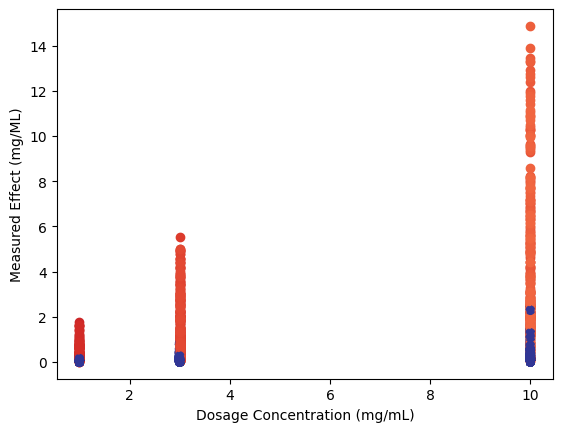

In [108]:
import pennylane as qml

effectValues = df.query('DVID==1')["DV"].to_numpy().astype(np.float64)[0:20]
print(effectValues)
dev = qml.device('default.qubit', wires=len(effectValues))

U = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
@qml.qnode(dev)
def example_circuit():
    wireIterator = 0
    for effectValue in effectValues: 
        qml.RY(effectValue, wires=wireIterator)
        qml.QubitUnitary(U, wires=wireIterator)
        wireIterator += 1
    

    qml.QFT(wires=range(len(effectValues),0))
    #inverse QFT 
    qml.QFT(wires=range(0,len(effectValues)))

    return qml.state()

QFToutputs = np.abs(example_circuit())

i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    D = df.query(f'ID=={i} & DVID==1')['DOSE'] 
    Cfinal = df.query(f'ID=={i} & DVID==1')['DV']
    t = df.query(f'ID=={i} & DVID==1')['TIME'] 
    W = df.query(f'ID=={i} & DVID==1')['BW']
    M = df.query(f'ID=={i} & DVID==1')['COMED'] + 1
    QFTResults = QFToutputs[0:len(df.query(f'ID=={i} & DVID==1')['DOSE'])] * (t*D)/(W*M)
    plt.scatter(D , Cfinal, color=plt.cm.RdYlBu(i))
    plt.scatter(D , QFTResults, color=plt.cm.RdYlBu(i*55), linestyle='dashed')
    plt.xlabel("Dosage Concentration (mg/mL)")
    plt.ylabel("Measured Effect (mg/ML)")
    plt.autoscale()
    i+=1
print(np.abs(example_circuit()))

This is better, but not the best. To get closer, it seems that we are missing a scaling constant for our T*D or have misunderstood the linearity (or lack thereof) of the relationship. Let's try another attempt squaring our initial dosage:

[0.186473  0.245674  0.256092  0.215776  0.152528  0.0551604 0.190884
 0.110174  0.205427  0.365588  0.475907  0.53136   0.686488  0.747435
 0.807693  0.787551  0.606553  0.59121   0.372569  0.340783 ]
[0.58279278 0.03501529 0.04623597 ... 0.01223771 0.04623597 0.03501529]


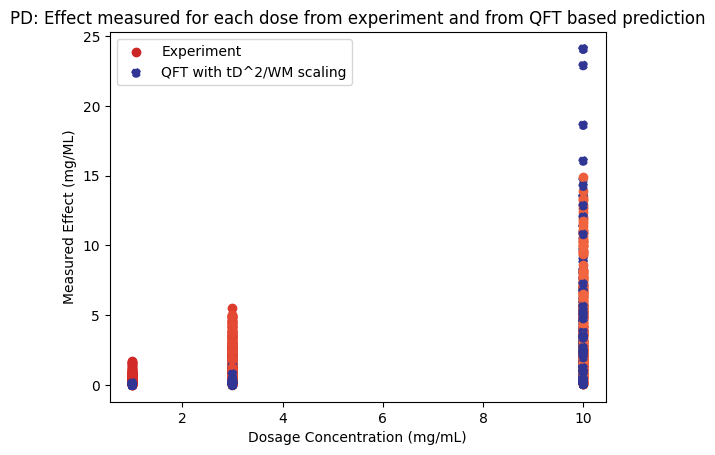

In [147]:
import pennylane as qml

effectValues = df.query('DVID==1')["DV"].to_numpy().astype(np.float64)[0:20]
print(effectValues)
dev = qml.device('default.qubit', wires=len(effectValues))

U = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
@qml.qnode(dev)
def example_circuit():
    wireIterator = 0
    for effectValue in effectValues: 
        qml.RY(effectValue, wires=wireIterator)
        qml.QubitUnitary(U, wires=wireIterator)
        wireIterator += 1
    

    qml.QFT(wires=range(len(effectValues),0))
    #inverse QFT 
    qml.QFT(wires=range(0,len(effectValues)))

    return qml.state()

QFToutputs = np.abs(example_circuit())
labels = ["Experiment","QFT with tD^2/WM scaling"]
i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    D = df.query(f'ID=={i} & DVID==1')['DOSE'] 
    Cfinal = df.query(f'ID=={i} & DVID==1')['DV']
    t = df.query(f'ID=={i} & DVID==1')['TIME'] 
    W = df.query(f'ID=={i} & DVID==1')['BW']
    M = df.query(f'ID=={i} & DVID==1')['COMED'] + 1
    QFTResults = QFToutputs[0:len(df.query(f'ID=={i} & DVID==1')['DOSE'])] * (t*D**(2))/(W*M)
    plt.scatter(D , Cfinal, color=plt.cm.RdYlBu(i))
    plt.scatter(D , QFTResults, color=plt.cm.RdYlBu(i*55), linestyle='dashed')
    plt.xlabel("Dosage Concentration (mg/mL)")
    plt.ylabel("Measured Effect (mg/ML)")
    plt.title("PD: Effect measured for each dose from experiment and from QFT based prediction")
    plt.autoscale()
    i+=1
plt.legend(labels)
print(np.abs(example_circuit()))

This seems to model the dosage vs effect chart well, with only a few outliers at the higher dosage occuring. Using this same data and using a similar naive scaling for QFT, let us see if we get similar biomarker concentrations to experiment.

[18.6174 13.7783 16.5747 16.8486 18.6459 17.1909 17.0175 16.0937 14.5107
 18.1275 16.9465 16.2409 16.5344 15.9131 17.7861 15.6413 18.809  16.46
 14.5575 16.35  ]
[8.70614069e-08 1.10931113e-08 1.10630083e-07 ... 2.08418572e-08
 1.10630083e-07 1.10931113e-08]


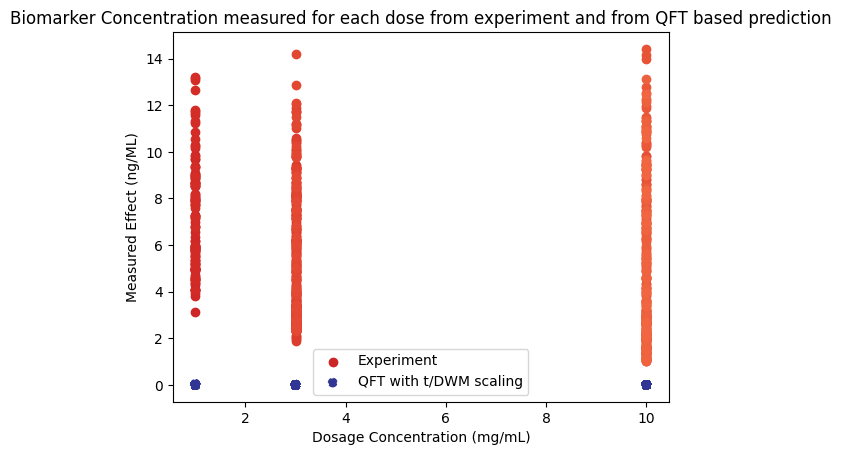

In [152]:
import pennylane as qml

biomarkerValues = df.query('DVID==2')["DV"].to_numpy().astype(np.float64)[0:20]
print(biomarkerValues)
dev = qml.device('default.qubit', wires=len(biomarkerValues))

U = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
@qml.qnode(dev)
def example_circuit():
    wireIterator = 0
    for effectValue in biomarkerValues: 
        qml.RY(effectValue, wires=wireIterator)
        qml.QubitUnitary(U, wires=wireIterator)
        wireIterator += 1
    

    qml.QFT(wires=range(len(biomarkerValues),0))
    #inverse QFT 
    qml.QFT(wires=range(0,len(biomarkerValues)))

    return qml.state()

QFToutputs = np.abs(example_circuit())
labels = ["Experiment","QFT with t/DWM scaling"]
i = 20;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    D = df.query(f'ID=={i} & DVID==2')['DOSE'] 
    Cfinal = df.query(f'ID=={i} & DVID==2')['DV']
    t = df.query(f'ID=={i} & DVID==2')['TIME'] 
    W = df.query(f'ID=={i} & DVID==2')['BW']
    M = df.query(f'ID=={i} & DVID==2')['COMED'] + 1
    QFTResults = QFToutputs[0:len(df.query(f'ID=={i} & DVID==2')['DOSE'])] * (t/D*W*M)
    plt.scatter(D , Cfinal, color=plt.cm.RdYlBu(i))
    plt.scatter(D , QFTResults, color=plt.cm.RdYlBu(i*55), linestyle='dashed')
    plt.xlabel("Dosage Concentration (mg/mL)")
    plt.ylabel("Measured Effect (ng/ML)")
    plt.title("Biomarker Concentration measured for each dose from experiment and from QFT based prediction")
    plt.autoscale()
    i+=1
plt.legend(labels)
print(np.abs(example_circuit()))

This did not work. Is it because our QFT method works well only for that set of data, and there is a different state encoding required here? Or is it because the biomarker's relationship is not correlated as initially thought? Let's try embedding a different set of values into our interpolation.

[1.08741  0.900372 0.835046 0.727262 0.693068 0.398507 0.221864 0.229653
 0.211456 0.213653 0.225386 0.229454 0.270922 0.230704 0.243639 0.239467
 0.269942 0.33777  0.343845 0.814746]
[0.5012623  0.2186025  0.17127651 ... 0.10866879 0.17127651 0.2186025 ]


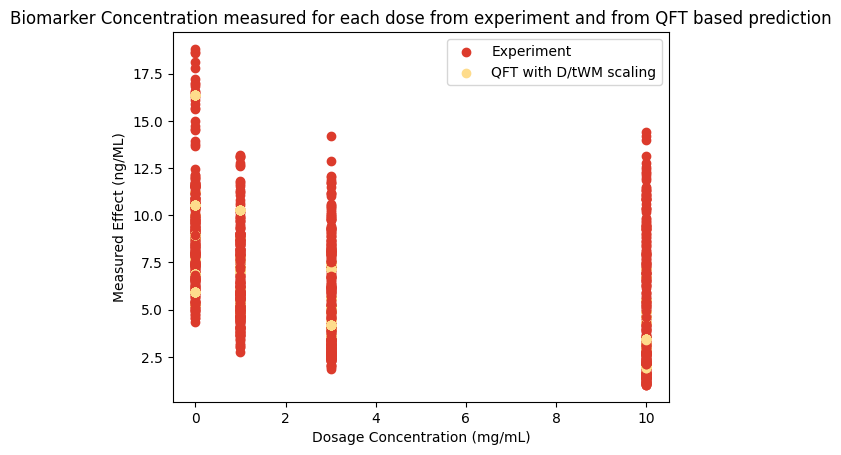

In [193]:
import pennylane as qml

biomarkerValues = df.query('DVID==2')["DV"].to_numpy().astype(np.float64)[-20:]*0.1
print(biomarkerValues)
dev = qml.device('default.qubit', wires=len(biomarkerValues))

U = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
@qml.qnode(dev)
def example_circuit():
    wireIterator = 0
    for effectValue in biomarkerValues: 
        qml.RY(effectValue, wires=wireIterator)
        qml.QubitUnitary(U, wires=wireIterator)
        wireIterator += 1
    

    qml.QFT(wires=range(len(biomarkerValues),0))
    #inverse QFT 
    qml.QFT(wires=range(0,len(biomarkerValues)))

    return qml.state()

QFToutputs = np.abs(example_circuit())
labels = ["Experiment","QFT with D/tWM scaling"]
i = 0;
totalNumberOfPatients = 48
while i <= totalNumberOfPatients:
    D = df.query(f'ID=={i} & DVID==2')['DOSE'] 
    Cfinal = df.query(f'ID=={i} & DVID==2')['DV']
    t = df.query(f'ID=={i} & DVID==2')['TIME'] 
    W = df.query(f'ID=={i} & DVID==2')['BW']
    M = df.query(f'ID=={i} & DVID==2')['COMED'] + 1
    QFTResults = Cfinal.median() - (QFToutputs[0:len(df.query(f'ID=={i} & DVID==2')['DOSE'])] * D/(t*(W)*M))
    plt.scatter(D , Cfinal, color=plt.cm.RdYlBu(30))
    plt.scatter(D , QFTResults, color=plt.cm.RdYlBu(100))
    plt.xlabel("Dosage Concentration (mg/mL)")
    plt.ylabel("Measured Effect (ng/ML)")
    plt.title("Biomarker Concentration measured for each dose from experiment and from QFT based prediction")
    plt.autoscale()
    i+=1
plt.legend(labels)
print(np.abs(example_circuit()))

That looks a bit better, and would seem to be better due to a few major reasons: 

1. Since the biomarker concentration exists even with a placebo, we must start with biomarker concentration and then subtract the effect.
2. Biomarker concentration, even in the placebo case, actually went down over time, making time and biomarker concentration actually inversely related.
3. The QFT circuit (or any quantum circuit with a rotational ansatz) requires a radian input. The output states without treatment of our input by multiplication of 0.1 were essentially just slightly above 0, largely due to the Ry gate treatment of the concentration values being > 2 $\pi$.

So actually, the correct relationship here would be $C_{final, biomarker} \propto C_{placebo, biomarker}-D/tWM $

Now, you may be wondering: How about in cases where you do not have a placebo case for your biomarker concentration? How will this QFT method and this scaling work then? 
There should always be a placebo or at the very least, a baseline biomarker concentration set of values. Otherwise, it would be difficult to make the claim that the protein/metabollite/ligand/what-have-you is a biomarker. For example, Vascular endothelial growth factor (VEGF) is a common biomarker in blood cancer indications and is well characterized [X].

*X. Murukesh N, Dive C, Jayson GC. Biomarkers of angiogenesis and their role in the development of VEGF inhibitors. British journal of cancer. 2010 Jan;102(1):8-18. https://doi.org/10.1038/sj.bjc.6605483*

## Part 3: Implement the best method given the known constraints on GEFION: Can we do it? Why should WE specifically do it? 

One thing we have attempted to work towards at Iff and are hoping to continue to work towards with our collaborators is determining the computational complexity of our "dream solutions" to the problems that lay ahead of us in the drug discovery, development, and commercialization process, both by comparing to literature on the topic as well as completing benchmarking, and identifying the solutions that can scale with the lowest complexity and highest accuracy. 

In this case, if the problem to be solved, as we have attempted here, is the **correct interpolation** of limited PK, PD, and PK/PD data in order to determine PK/PD outcomes for a larger population, and one is comparing the computational complexity of QFT to RBF, it would appear that QFT scales worse than RBF, as the best implementation of RBF with a Gaussian basis (which was not used in this code) scales in $O(N)$ [Y] while QFT scales in $O(NlogN)$ [Z]. However, the extra step required to generate enough samples to use as inputs for RBF, combined with the potential requirement to use thin spline, and not gaussian interpolation, means that this could scale worse, and should be thoroughly evaluated. As for the comparison of QFT to FFT, since they have the same computational complexity, the advantage would arise if the graph for which QFT could provide a transform is tremendously larger on a quantum device than what can be done classically. 

We would appreciate access to GEFION to be able to thorughly complete this benchmarking, especially for larger datasets than the one that was used here, to, at scale and looking across entire computational workflow, determine the scalability of RBF and of FFT compared to QFT to determine if a large enough quantum device can truly, at some scale, complete interpolation better than a supercomputer. Given the largest simulation completed on GEFION publically available is 40 qubits [Z1], it would be tremendously interesting to see if a quantum device with say, 41 qubits, would outpeform an FFT of a graph size of $2^{40}$ points. 

As participants in UC Davis' START program, which provides us access to AWS credits, members of Xanadu's Quantum Sandbox program, members of the IBM Quantum Research program, and QED-C members, we have had access to superconducting, photonic, neutral atom, quantum annealing, and more device types. Moreover, we have been fortunate to collaborate with quantum and biopharma industry trailblazers at startups and large companies alike to be able to get the advice and input we need to complete these benchmarking experiments, and count scientists at companies such as QuEra as our previous cofounders and collaborators. 

Beyond this benchmarking, we are also interested in the following question after completing this work: 

Is it possible to correlate between dosage concentration graphs and IC50 scores, especially if the biomarker and number of compartments is known? This would be fascinating to understand, and would really make retrosynthesis [Z2] more mathematical than statistical. 

*Y. Torres CE, Barba LA. Fast radial basis function interpolation with Gaussians by localization and iteration. Journal of Computational Physics. 2009 Aug 1;228(14):4976-99.  https://doi.org/10.1016/j.jcp.2009.03.007*


*Z.Schuld M. It's all about groups: From Fast Fourier Transforms to QFTs. Available from: https://web.archive.org/web/20250930053420/https://pennylane.ai/qml/demos/tutorial_qft_and_groups* 

*Z1. Miller M, Günther J, Witteveen F, Teynor MS, Erakovic M, Reiher M, Solomon GC, Christandl M. phase2: Full-State Vector Simulation of Quantum Time Evolution at Scale. arXiv preprint arXiv:2504.17881. 2025 Apr 24.*

*Z2. Guo J, Schwaller P. Directly optimizing for synthesizability in generative molecular design using retrosynthesis models. Chemical Science. 2025;16(16):6943-56.*



## Part 4: Solve the questions provided 

The solution to the tasks provided will be completed during Phase II of the challenge, and will be completed using both the QFT and RB